In [2]:
import os
import difflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches as mpatches

import sys
sys.path.append('../../')
from rllte.evaluation.visualization import _annotate_and_decorate_axis, plot_interval_estimates
from rllte.evaluation import Performance
from utils import smooth

# 1 Maze Hard

PPO_ ICM (5, 10)
PPO_ Disagreement (5, 10)
PPO_ E3B (5, 10)
PPO_ RND (5, 10)
PPO_ PseudoCounts (5, 10)
PPO_ RIDE (5, 10)
PPO_ RE3 (5, 10)
PPO_ NGU (5, 10)
PPO_ Extrinsic (5, 10)
twoHeadPPO_ ICM (5, 10)
twoHeadPPO_ Disagreement (5, 10)
twoHeadPPO_ E3B (5, 10)
twoHeadPPO_ RND (5, 10)
twoHeadPPO_ PseudoCounts (5, 10)
twoHeadPPO_ RIDE (5, 10)
twoHeadPPO_ RE3 (5, 10)
twoHeadPPO_ NGU (5, 10)
twoHeadPPO_ Extrinsic (0,)


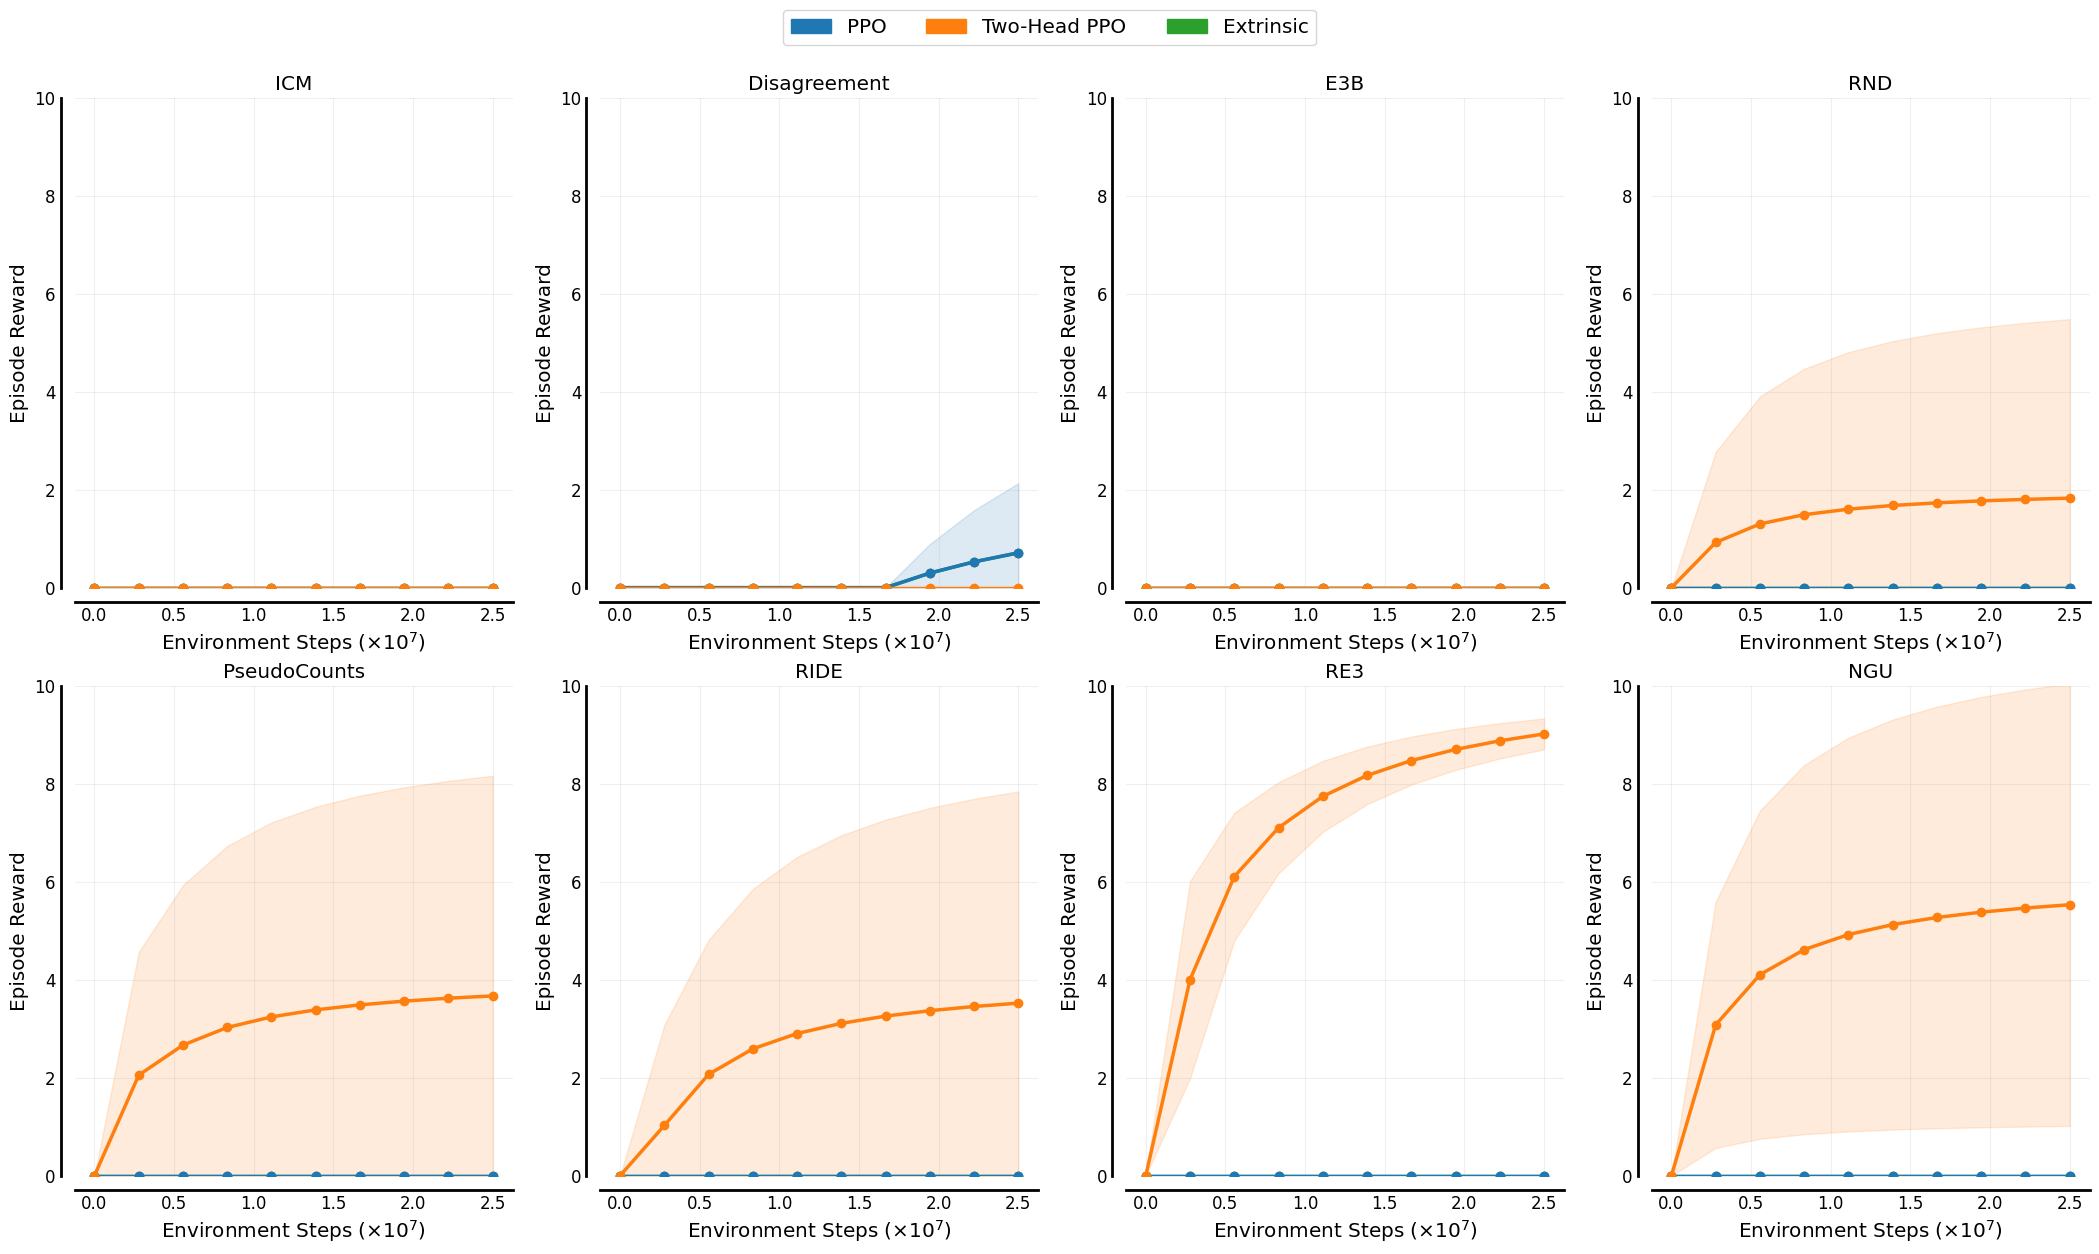

In [8]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU', 'Extrinsic']
colors = sns.color_palette()
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(['PPO', 'Two-Head PPO', 'Extrinsic'])]

fig, axes = plt.subplots(2, 4, figsize=(26, 14))
legends = ['PPO', 'Two-Head PPO']
lines = []

for subplot_idx, candidate in enumerate(['PPO_', 'twoHeadPPO_']):
    root = f"./data/q6/1MazeHard/"
    num_points = 10
    all_data = {algo: [] for algo in algos}

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir and dir.startswith(candidate):
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
                data = smooth(data, 0.95)
                all_data[algo].append(data)

        all_data[algo] = np.array(all_data[algo])
        print(candidate, algo, all_data[algo].shape)

    for algo_idx, algo in enumerate(algos[:-1]):
        mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
        ax = axes.flatten()[algo_idx]
        x = np.linspace(0, 2.5, num_points)
        if subplot_idx == 0:
            # ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
            ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=colors[2], label='Extrinsic')
        ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=colors[subplot_idx], label=legends[subplot_idx])
        ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=colors[subplot_idx])
        ax.set_ylim(0, 10)
        ax.set_title(algos[algo_idx], fontsize="x-large")
        ax = _annotate_and_decorate_axis(ax, 
                                        ticklabelsize="large",
                                        xlabel=r"Environment Steps ($\times 10^7$)", 
                                        ylabel="Episode Reward",
                                        xticklabels=np.linspace(0, 1, num_points),
                                        )
        
fig.legend(fake_patches, ['PPO', 'Two-Head PPO', 'Extrinsic'], loc='upper center', 
    fancybox=True, ncol=len(algos), 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 0.95))
fig.savefig('figure_rq6_curves_1mazehard.pdf', bbox_inches='tight', dpi=300)

# All Maze Hard

PPO_ ICM (5, 10)
PPO_ Disagreement (5, 10)
PPO_ E3B (5, 10)
PPO_ RND (5, 10)
PPO_ PseudoCounts (5, 10)
PPO_ RIDE (5, 10)
PPO_ RE3 (5, 10)
PPO_ NGU (5, 10)
PPO_ Extrinsic (5, 10)
twoHeadPPO_ ICM (5, 10)
twoHeadPPO_ Disagreement (5, 10)
twoHeadPPO_ E3B (5, 10)
twoHeadPPO_ RND (10, 10)
twoHeadPPO_ PseudoCounts (5, 10)
twoHeadPPO_ RIDE (5, 10)
twoHeadPPO_ RE3 (5, 10)
twoHeadPPO_ NGU (5, 10)
twoHeadPPO_ Extrinsic (0,)


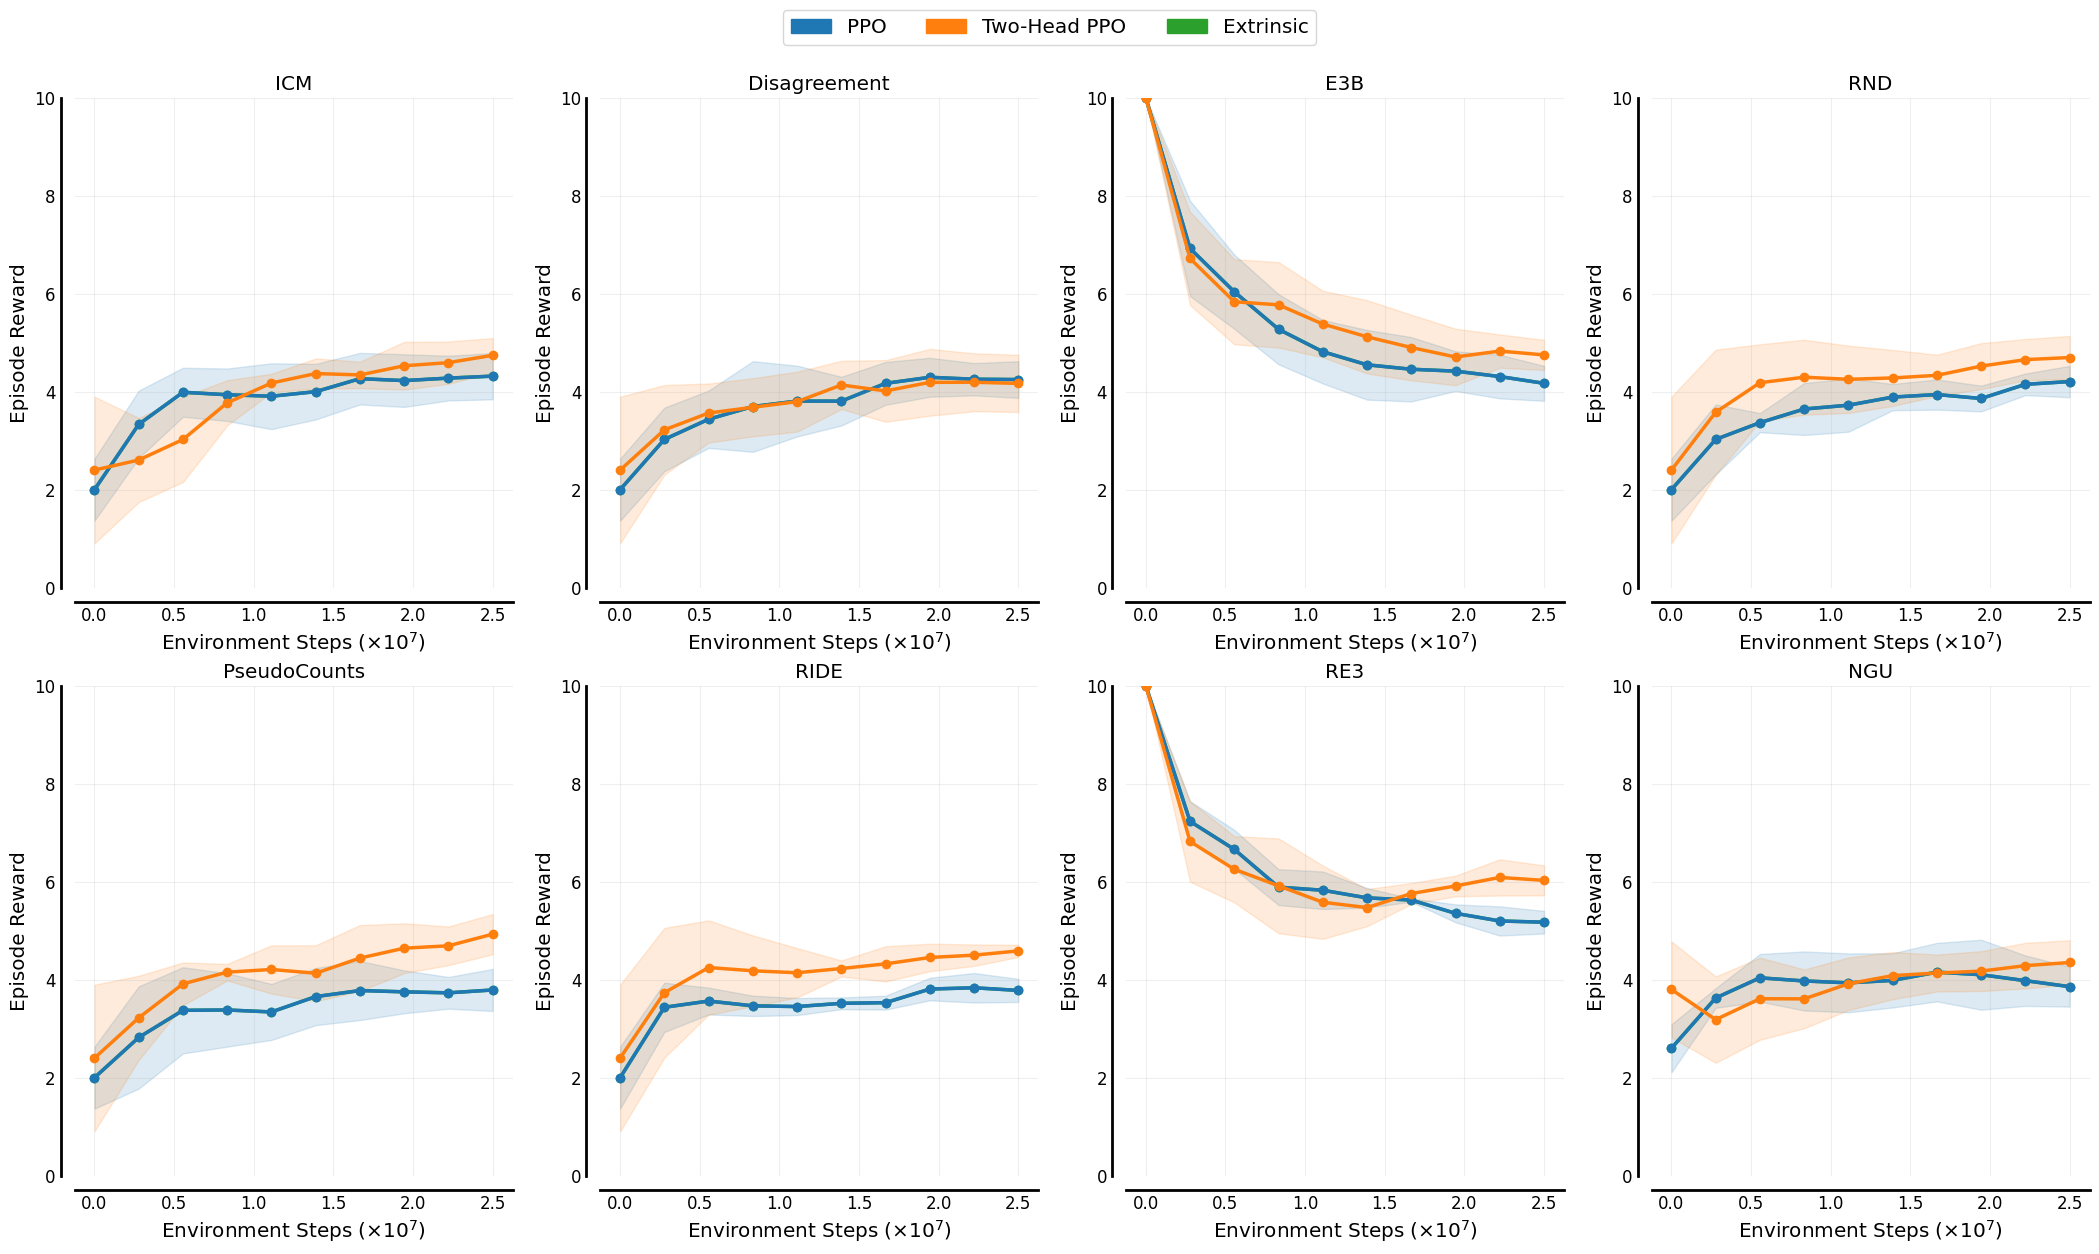

In [9]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU', 'Extrinsic']
# colors = sns.color_palette("husl", len(algos))
# colors = sns.husl_palette(3, h=.5)
colors = sns.color_palette()
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(['PPO', 'Two-Head PPO', 'Extrinsic'])]

fig, axes = plt.subplots(2, 4, figsize=(26, 14))
legends = ['PPO', 'Two-Head PPO']
lines = []

for subplot_idx, candidate in enumerate(['PPO_', 'twoHeadPPO_']):
    root = f"./data/q6/AllMazeHard/"
    num_points = 10
    all_data = {algo: [] for algo in algos}

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir and dir.startswith(candidate):
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
                data = smooth(data, 0.95)
                all_data[algo].append(data)

        all_data[algo] = np.array(all_data[algo])
        print(candidate, algo, all_data[algo].shape)

    for algo_idx, algo in enumerate(algos[:-1]):
        mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
        ax = axes.flatten()[algo_idx]
        x = np.linspace(0, 2.5, num_points)
        if subplot_idx == 0:
            # ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
            ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=colors[2], label='Extrinsic')
        ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=colors[subplot_idx], label=legends[subplot_idx])
        ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=colors[subplot_idx])
        ax.set_ylim(0, 10)
        ax.set_title(algos[algo_idx], fontsize="x-large")
        ax = _annotate_and_decorate_axis(ax, 
                                        ticklabelsize="large",
                                        xlabel=r"Environment Steps ($\times 10^7$)", 
                                        ylabel="Episode Reward",
                                        xticklabels=np.linspace(0, 1, num_points),
                                        )
        
fig.legend(fake_patches, ['PPO', 'Two-Head PPO', 'Extrinsic'], loc='upper center', 
    fancybox=True, ncol=len(algos), 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 0.95))
fig.savefig('figure_rq6_curves_allmazehard.pdf', bbox_inches='tight', dpi=300)